# CHAPTER 4
# NumPy Basics: Arrays and Vectorized Computation
This chapter will focus on:
- Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations
- Common array algorithms like sorting, unique, and set operations
- Efficient descriptive statistics and aggregating/summarizing data
- Data alignment and relational data manipulations for merging and joining together heterogeneous datasets
- Expressing conditional logic as array expressions instead of loops with if-elif-else branches
- Group-wise data manipulations (aggregation, transformation, function application)

## Why NumPy?
- NumPy-based algorithms are generally **10 to 100 times faster** (or more) than their pure Python counterparts and use significantly less memory.

In [12]:
# Import numpy library
import numpy as np

In [13]:
# Test performance by comparing a NumPy array of one million integers, and the equivalent Python list

# Create numpy array
my_arr = np.arange(1000000)

# Create list
my_list = list(range(1000000))

In [14]:
# Multiply the numpy array by 2
for _ in range(10):
    my_arr2 = my_arr * 2

In [15]:
# Multiply the list by 2
for _ in range(10):
    my_list2 = [x * 2 for x in my_list]

## The NumPy ndarray: A Multidimensional Array Object
- Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.
- Is best to **import numpy as np** as the numpy namespace is large and contains a number of functions whose names conflict with built-in Python functions (like min and max).
- **ndarray** = is a generic multidimensional container for homogeneous data, so all of the elements must be the same type.
- Every array has a **shape**, a tuple indicating the size of each dimension.
- Every array has a **dtype**, an object describing the data type of the array.

In [16]:
# Generate some random data
data = np.random.randn(2,3)
data

array([[ 0.14781248, -0.69752278, -0.3461794 ],
       [ 0.8337662 ,  0.07642072,  0.55757396]])

In [17]:
# Check the shape of an array
data.shape

(2, 3)

In [18]:
# Check the type of the array
data.dtype

dtype('float64')

### Creating ndarrays
**TABLE: Array creation functions**


| Function                  | Description |
| :---                  |    :----    |
| array  | Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype or explicitly specifying a dtype; copies the input data by default| 
| asarray | Convert input to ndarray, but do not copy if the input is already an ndarray|
| arange            | Like the built-in range but returns an ndarray instead of a list|
| ones, ones_like | Produce an array of all 1s with the given shape and dtype; ones_like takes another array and produces a ones array of the same shape and dtype|
| zeros, zeros_like | Like ones and ones_like but producing arrays of 0s instead|
| empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros| 
| full, full_like  | Produce an array of the given shape and dtype with all values set to the indicated “fill value” full_like takes another array and produces a filled array of the same shape and dtype| 
| eye, identity  | Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)| 

In [19]:
# Create an array using the array function
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [20]:
# Unless explicitly specified np.array tries to infer a good data type for the array that it creates

# Check the type of arr1
arr1.dtype

dtype('float64')

In [21]:
# Functions zeros and ones create arrays of 0s or 1s, respectively, with a given length or shape
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
# Create a higher dimensional array using ones fucntion & passing a tuple for the shape
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [13]:
# The function arange is an array-valued version of the built-in Python range function
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### Data Types for ndarrays
- **dtype** is a special object containing the information that the **ndarray** needs, to interpret a chunk of memory as a particular type of data.
- The numerical **dtypes** are named as: a type name, like float or int, followed by a number indicating the number of bits per element.
- Important is the general kind of data you’re dealing with, whether floating point, complex, integer, boolean, string, or general Python object.

**TABLE: NumPy data types**

| Type | Type code | Description |
| :-- |    :------  | :----       |
|int8, uint8| i1, u1| Signed and unsigned 8-bit (1 byte) integer types|
|int16, uint16| i2, u2| Signed and unsigned 16-bit integer types|
|int32, uint32| i4, u4| Signed and unsigned 32-bit integer types|
|int64, uint64| i8, u8| Signed and unsigned 64-bit integer types|
|float16| f2| Half-precision floating point|
|float32| f4 or f| Standard single-precision floating point; compatible with C float|
|float64| f8 or d| Standard double-precision floating point; compatible with C double and Python float object|
|float128| f16 or g| Extended-precision floating point|
|complex64, complex128, complex256| c8, c16, c32 | Complex numbers represented by two 32, 64, or 128 floats, respectively|
|bool| ?| Boolean type storing True and False values|
|object| 0 | Python object type; a value can be any Python object|
|string_| S | Fixed-length ASCII string type (1 byte per character); for example, to create a string dtype with length 10, use 'S10'|
|unicode_| U |Fixed-length Unicode type (number of bytes platform specific); same specification semantics as string_ (e.g., 'U10')|

In [23]:
# Create an array of type float64
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [26]:
# Create an array of int32 type from a list
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [27]:
# You can use astype method to cast an array from one dtype to another
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [28]:
# Create an array with float numbers
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [29]:
# Casting floating-point to integer => decimal part will be truncated
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

**REMEBER**: Calling **astype** always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.

### Arithmetic with NumPy Arrays
- Arrays are important because they enable you to express batch operations on data without writing any for loops. 
- NumPy users call this **vectorization**. 
- Any arithmetic operations between equal-size arrays applies the operation **element-wise**.
- Arithmetic operations with scalars propagate the scalar argument to each element in the array.
- Comparisons between arrays of the same size yield **boolean arrays**.

In [30]:
# Create a 2x3 array
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [31]:
# Multiplication
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [32]:
# Multiplication with a scalar
arr * 6

array([[ 6., 12., 18.],
       [24., 30., 36.]])

In [33]:
# Create a second array
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

# Compare arr and arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing
- Array **slices** are **views** on the original array.
- This means that the data is **NOT COPIED**, and any modifications to the view will be reflected in the source array.

In [34]:
# One-dimensional arrays on the surface act similarly to Python lists

# Create array
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
# Select element at index = 5
arr[5]

5

In [36]:
# Assigning a value to a slice will propagate the value to the entire selection
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [37]:
# Create a slice of array arr
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [38]:
# Change values in arr_slice
arr_slice[1] = 12345

In [39]:
# Changes to arr_slice are reflected in the original array arr
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [40]:
# The “bare” slice [:] will assign to all values in an array
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [41]:
# Indexing & slicing for higher dimensional arrays

# Create a 3x3 array
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [42]:
# Select element at index 2
arr2d[2]

array([7, 8, 9])

In [43]:
# Individual elements can be accessed recursively
arr2d[0][2]

3

In [44]:
# Or you can pass a comma-separated list of indices to select individual elements
arr2d[0, 2]

3

#### Indexing with slices

In [45]:
# Consider a two-dimensional array
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
# Using arr2d[:2] means “select the first two rows of arr2d”
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
# You can pass multiple slices just like you can pass multiple indexes
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

**REMEMBER**: By mixing integer indexes and slices, you get lower dimensional slices.

In [48]:
# Select the second row but only the first two columns
arr2d[1, :2]

array([4, 5])

In [49]:
# Select the third column but only the first two rows
arr2d[:2, 2]

array([3, 6])

In [50]:
# A colon by itself means to take the entire axis
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [42]:
# Assigning to a slice expression assigns to the whole selection
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [51]:
# Array of names containing duplicates
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [52]:
# Use randn function in numpy.random to generate some random normally distributed data
data = np.random.randn(7, 4)
data

array([[-1.13376652,  1.21843774, -0.31865029, -0.16731577],
       [ 0.71852635,  1.05648783, -0.47383525,  1.62662825],
       [ 1.63372618, -0.29582189, -1.79451562,  0.08176282],
       [-1.1930565 , -3.00144687,  0.82905914,  1.30823041],
       [-0.54960022, -1.04723964,  0.69593336,  0.96723795],
       [-0.38470732,  1.00616724,  1.36916112,  0.64926103],
       [-0.5207007 ,  0.88877167, -0.82022371,  1.66098834]])

- Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'. 
- Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. 
- Comparing names with the string 'Bob' yields a boolean array.
- The boolean array must be of the same length as the array axis it’s indexing.
- Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

In [53]:
# Compare the array names with the string 'Bob'
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [54]:
# This boolean array can be passed when indexing the array data
data[names == 'Bob']

array([[-1.13376652,  1.21843774, -0.31865029, -0.16731577],
       [-1.1930565 , -3.00144687,  0.82905914,  1.30823041]])

In [55]:
# To select everything but 'Bob', you can either use != or negate the condition using ~
# The ~ operator can be useful when you want to invert a general condition
data[~(names == 'Bob')]

array([[ 0.71852635,  1.05648783, -0.47383525,  1.62662825],
       [ 1.63372618, -0.29582189, -1.79451562,  0.08176282],
       [-0.54960022, -1.04723964,  0.69593336,  0.96723795],
       [-0.38470732,  1.00616724,  1.36916112,  0.64926103],
       [-0.5207007 ,  0.88877167, -0.82022371,  1.66098834]])

In [50]:
# Selecting two of the three names to combine multiple boolean conditions, 
# use boolean arithmetic operators like & (and) and | (or)

mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

**REMEMBER**: The Python keywords and and or do not work with boolean arrays. Use & (and) and | (or) instead.

In [56]:
# Set all of the negative values in data to 0
data[data < 0] = 0
data

array([[0.        , 1.21843774, 0.        , 0.        ],
       [0.71852635, 1.05648783, 0.        , 1.62662825],
       [1.63372618, 0.        , 0.        , 0.08176282],
       [0.        , 0.        , 0.82905914, 1.30823041],
       [0.        , 0.        , 0.69593336, 0.96723795],
       [0.        , 1.00616724, 1.36916112, 0.64926103],
       [0.        , 0.88877167, 0.        , 1.66098834]])

In [58]:
names != 'Joe'

array([ True, False,  True,  True,  True, False, False])

In [57]:
# Set whole rows or columns using a one-dimensional boolean array
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.71852635, 1.05648783, 0.        , 1.62662825],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.00616724, 1.36916112, 0.64926103],
       [0.        , 0.88877167, 0.        , 1.66098834]])

### Fancy Indexing
- **Fancy indexing** is a term adopted by NumPy to describe indexing using integer arrays.
- Fancy indexing, unlike slicing, always copies the data into a new array.
- The result of fancy indexing is always one-dimensional.

In [54]:
# Create an 8x4 array
arr = np.empty((8, 4))

# Use a for loop to assign values in the array
for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [55]:
# To select a subset of the rows in a particular order, you can simply pass a list or
# ndarray of integers specifying the desired order

arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [57]:
# Create a second array
arr2 = np.arange(32).reshape((8,4))
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [65]:
# Passing multiple index arrays selects a one-dimensional array of elements corresponding to each tuple of indices
arr2[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

### Transposing Arrays and Swapping Axes
- **Transposing** is a special form or **reshaping** which return a view of the data without copying anything.
- Arrays have the **transpose** method and the special **.T** attribute.
- This method is used for matrix computations, for example when computing the inner matrix product using **np.dot**.
- For higher-dimensional arrays, **transpose** will accept a tuple of axis numbersto permute the axes.
- Simple transposing with **.T** is a special case of swapping axes.
- ndarray has the method **swapaxes** which takes a pair of axis numbers and switches the indicated axes to rearrange the data.
- **swapaxes** return a view of the data without making a copy.

In [59]:
# Create a 3x5 array using arrange and reshape
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [60]:
# Calculate the transpose of arr => in an array 5x3
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [61]:
# Create another array 6x3
arr2 = np.random.randn(6, 3)
arr2

array([[ 0.06080748, -1.01204957,  1.22720434],
       [-0.26698262, -0.89684727,  1.03009745],
       [-0.24847478, -0.07475732,  0.4531686 ],
       [-0.62208077, -0.03490241,  1.78437271],
       [-0.54095462,  0.54156417, -0.61224367],
       [ 1.22846001, -0.06063797,  0.71554158]])

In [62]:
# Calculate inner matrix product using np.dot
np.dot(arr2.T, arr2)

array([[ 2.32544737, -0.14926309, -0.21280958],
       [-0.14926309,  2.13235491, -2.63694652],
       [-0.21280958, -2.63694652,  6.84332109]])

In [63]:
# Create a higher dimensional array
arr3 = np.arange(16).reshape(2, 2, 4)
arr3

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [64]:
# Use transpose method 
arr3.transpose((1, 0, 2))

# Here the axes have been reordered with the second axis first, the first axis second,
# and the last axis unchanged

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [65]:
# Use swapaxes for arr3
print('Original:\n', arr3) 
print('\n\nSwapped:\n', arr3.swapaxes(1, 2))

Original:
 [[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


Swapped:
 [[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


## Universal Functions: Fast Element-Wise Array Functions
- **Universal function** (**ufunc**) = a function that performs element-wise operations on data in ndarrays.
- Many **ufuncs** are simple element-wise transformations, like **sqrt** or **exp** and are referred to as **unary ufuncs**.
- Others, such as **add** or **maximum**, take two arrays (thus, **binary ufuncs**) and return a single array as the result.

In [66]:
# Create a 1D array
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
# Use sqrt function to calculate the square root element-wise
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [68]:
# Create 2 arrays with random numbers
x = np.random.randn(8)
y = np.random.randn(8)

# Print x and y
print(x)
print(y)

[ 0.24327452 -0.56143308  1.0269099   0.57835369 -0.79560507  0.42050112
  1.92063911  0.82684889]
[-0.85213974  1.05673973 -1.2970065  -0.91443462 -1.00559035 -3.03417276
 -0.63545818  0.73268106]


In [69]:
# Use np.numpy.maximum to compute the element-wise maximum of the elements in x and y
np.maximum(x, y)

array([ 0.24327452,  1.05673973,  1.0269099 ,  0.57835369, -0.79560507,
        0.42050112,  1.92063911,  0.82684889])

- While not common, a **ufunc** can return multiple arrays. 
- **modf** is one example and it returns the fractional and integral parts of a floating-point array.

In [70]:
# Create an array
arr = np.random.randn(7) * 5
arr

array([ 1.21218926,  5.11459896, -4.68241572, 10.44635871, -8.19780273,
       -2.68883439,  3.89457075])

In [71]:
# Use the np.modf function
np.modf(arr)

(array([ 0.21218926,  0.11459896, -0.68241572,  0.44635871, -0.19780273,
        -0.68883439,  0.89457075]), array([ 1.,  5., -4., 10., -8., -2.,  3.]))

- **Ufuncs** accept an optional out argument that allows them to operate in-place on arrays.

In [72]:
# Use an out argument
np.sqrt(arr)
arr

c:\users\alexandra neagu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in sqrt



array([ 1.21218926,  5.11459896, -4.68241572, 10.44635871, -8.19780273,
       -2.68883439,  3.89457075])

**TABLE: Unary ufuncs**

|Function| Description     |
| :----- |    :----------  |
|abs, fabs| Compute the absolute value element-wise for integer, floating-point, or complex values|
|sqrt| Compute the square root of each element (equivalent to arr ** 0.5)|
|square| Compute the square of each element (equivalent to arr ** 2)|
|exp| Compute the exponent e^x of each element|
|log, log10,log2, log1p|Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively|
|sign| Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)|
|ceil| Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)|
|floor| Compute the floor of each element (i.e., the largest integer less than or equal to each element)
|rint| Round elements to the nearest integer, preserving the dtype
|modf| Return fractional and integral parts of array as a separate array
|isnan| Return boolean array indicating whether each value is NaN (Not a Number)
|isfinite, isinf| Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively
|cos, cosh, sin, sinh, tan, tanh| Regular and hyperbolic trigonometric functions
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh| Inverse trigonometric functions
|logical_not| Compute truth value of not x element-wise (equivalent to ~arr)

**TABLE: Binary universal functions**

|Function |Description|
| :--- |    :----------  |
|add| Add corresponding elements in arrays
|subtract| Subtract elements in second array from first array
|multiply| Multiply array elements
|divide, floor_divide| Divide or oor divide (truncating the remainder)
|power| Raise elements in first array to powers indicated in second array
|maximum, fmax| Element-wise maximum; fmax ignores NaN
|minimum, fmin| Element-wise minimum; fmin ignores NaN
|mod| Element-wise modulus (remainder of division)
|copysign| Copy sign of values in second argument to values in first argument
|greater, greater_equal, less, less_equal, equal, not_equal| Perform element-wise comparison, yielding boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)
|logical_and, logical_or, logical_xor |Compute element-wise truth value of logical operation (equivalent to infix operators & |, ^)

## Array-Oriented Programming with Arrays
- **Vectorization** = the practice of replacing explicit loops with array expressions.
- Vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

In [76]:
# EXAMPLE: evaluate the function sqrt(x^2 + y^2) across a regular grid of values

# Create an array with 1000 equally spaced points
points = np.arange(-5, 5, 0.01)


In [74]:
# np.meshgrid function takes two 1D arrays and produces two 2D matrices 
# corresponding to all pairs of (x, y) in the two arrays

xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [77]:
# Evaluating the function is a matter of writing the same expression you would write with two points
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

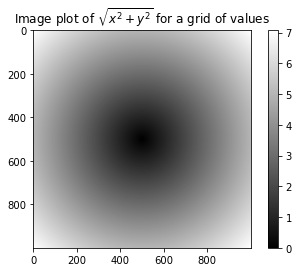

In [78]:
# Import matplotlib library to plot z
import matplotlib.pyplot as plt
%matplotlib inline

# Use the matplotlib function imshow() to create an image from the array z 
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

# Set the title of the plot
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## Expressing Conditional Logic as Array Operations
- The **np.where** function is a vectorized version of the ternary expression:
        x if condition else y  <=>  np.where(cond, x, y)
- The second and third arguments to **np.where** don’t need to be arrays; one or both of them can be scalars.
- A typical use of **where** in data analysis is to produce a new array of values based on another array.

In [79]:
# Consider a boolean array and two arrays of values
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

In [80]:
# Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [81]:
# Array of randomly generated data
arr = np.random.randn(4, 4)
arr

array([[ 0.41368144,  0.31364964,  0.90367613, -0.62183684],
       [-0.38356211,  0.86711575,  0.2111565 , -0.31093582],
       [-0.68690385,  0.46230279,  0.02718682, -0.72747168],
       [-0.18948662,  0.90847503,  0.43366901,  2.51299274]])

In [82]:
# Replace all positive values with 2 and all negative values with –2
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2,  2,  2, -2],
       [-2,  2,  2, -2],
       [-2,  2,  2,  2]])

In [83]:
# Replace all positive values in arr with the constant 2
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.62183684],
       [-0.38356211,  2.        ,  2.        , -0.31093582],
       [-0.68690385,  2.        ,  2.        , -0.72747168],
       [-0.18948662,  2.        ,  2.        ,  2.        ]])

## Mathematical and Statistical Methods
- Compute statistics about an entire array or about the data along an axis.
- You can call the array instance method **arr.mean()** or using the top-level NumPy function **np.mean(arr)**.

**TABLE: Basic array statistical methods**

|Method| Description
| :--- |    :----------  |
|sum| Sum of all the elements in the array or along an axis; zero-length arrays have sum 0
|mean| Arithmetic mean; zero-length arrays have NaN mean
|std, var| Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n)
|min, max| Minimum and maximum
|argmin, argmax| Indices of minimum and maximum elements, respectively
|cumsum| Cumulative sum of elements starting from 0
|cumprod| Cumulative product of elements starting from 1

In [84]:
# Generate some normally distributed random data
arr = np.random.randn(5, 4)
arr

array([[-0.50962074,  0.0514672 ,  0.16060592, -0.48597365],
       [-1.73541255,  0.44781154,  0.41641309, -0.99011225],
       [-0.35122744,  0.16110876, -0.35685217,  1.81353562],
       [-0.84784587, -0.57916465,  1.04870243, -0.22231951],
       [ 0.90453112,  1.24558325,  0.65592469,  0.82736357]])

In [85]:
# Compute mean
arr.mean()

0.08272591752733616

In [86]:
# Compute sum
np.sum(arr)

1.6545183505467231

In [87]:
# You can compute statistics over a given axis
arr.mean(axis=1)

# arr.mean(1) means “compute mean across the columns”

array([-0.19588032, -0.46532504,  0.31664119, -0.1501569 ,  0.90835066])

In [88]:
# You can compute statistics over a given axis
arr.sum(axis=0)

# arr.sum(0) means “compute sum down the rows”

array([-2.53957548,  1.3268061 ,  1.92479395,  0.94249378])

In [89]:
# Other methods like cumsum and cumprod do not aggregate, instead producing an array
# of the intermediate results

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

### Methods for Boolean Arrays
- Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods.
- **sum** is often used as a means of counting True values in a boolean array.
- **any** tests whether one or more values in an array is True.
- **all** checks if every value is True.

In [90]:
# Create random data
arr = np.random.randn(100)

# Count the number of positive values
(arr > 0).sum()

44

In [92]:
# Create boolean array
bools = np.array([False, False, True, False])
bools

array([False, False,  True, False])

In [93]:
# Test any  method
bools.any()

True

In [94]:
# Test all  method
bools.all()

False

### Sorting
- NumPy arrays can be sorted in-place with the **sort** method.
- You can sort each one-dimensional section of values in a multidimensional array in-place along an axis by passing the axis number to sort.
- The top-level method **np.sort** returns a sorted copy of an array instead of modifying the array in-place.

In [95]:
# Create random data
arr = np.random.randn(6)
arr

array([-0.97494974, -0.70164949,  0.28688318, -1.63213833,  0.77888429,
        0.03843283])

In [96]:
# Sort arr
arr.sort()
arr

array([-1.63213833, -0.97494974, -0.70164949,  0.03843283,  0.28688318,
        0.77888429])

In [97]:
# Create multidimensional array
arr = np.random.randn(5, 3)
arr

array([[ 0.08493753, -1.26438104,  0.08852214],
       [ 0.22720518,  1.13533938, -1.70028276],
       [-1.2838696 ,  1.61789496, -0.73089977],
       [-0.37576841, -0.35848769, -1.2737241 ],
       [-1.58394675,  1.00161662, -1.29250416]])

In [98]:
# Sort by columns
arr.sort(1)
arr

array([[-1.26438104,  0.08493753,  0.08852214],
       [-1.70028276,  0.22720518,  1.13533938],
       [-1.2838696 , -0.73089977,  1.61789496],
       [-1.2737241 , -0.37576841, -0.35848769],
       [-1.58394675, -1.29250416,  1.00161662]])

### Unique and Other Set Logic
- NumPy has some basic set operations for one-dimensional ndarrays.
- A commonly used one is **np.unique**, which returns the sorted unique values in an array.

In [99]:
# Create a 1D array of integers
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

# Select only unique elements
np.unique(ints)

array([1, 2, 3, 4])

**TABLE: Array set operations**

|Method| Description
| :--- |    :----------  |
|unique(x)| Compute the sorted, unique elements in x
|intersect1d(x, y)| Compute the sorted, common elements in x and y
|union1d(x, y)| Compute the sorted union of elements
|in1d(x, y)| Compute a boolean array indicating whether each element of x is contained in y
|setdiff1d(x, y)| Set difference, elements in x that are not in y
|setxor1d(x, y)| Set symmetric differences; elements that are in either of the arrays, but not both

## File Input and Output with Arrays
- **np.save** and **np.load** are the two workhorse functions for efficiently saving and loading array data on disk.
- Arrays are saved by default in an uncompressed raw binary format with file extension *.npy*
- If the file path does not already end in *.npy*, the extension will be appended.
- You save multiple arrays in an uncompressed archive using **np.savez** and passing the arrays as keyword arguments.
- If your data compresses well, you may wish to use **numpy.savez_compressed**.

## Linear Algebra
- Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library.
- Multiplying two two-dimensional arrays with * is an element-wise product instead of a **matrix dot product**.
- For matrix multiplication there is a function **dot**, both an array method and a function in the numpy namespace,

In [100]:
# Create two matrices
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

# Print x and y
print(x, '\n\n\n', y)

[[1. 2. 3.]
 [4. 5. 6.]] 


 [[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [101]:
# Matrix multiplication
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [102]:
# The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

**TABLE: Commonly used numpy.linalg functions**

|Function| Description
| :--- |    :----------  |
|diag| Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal
|dot |Matrix multiplication
|trace |Compute the sum of the diagonal elements
|det |Compute the matrix determinant
|eig| Compute the eigenvalues and eigenvectors of a square matrix
|inv| Compute the inverse of a square matrix
|pinv| Compute the Moore-Penrose pseudo-inverse of a matrix
|qr| Compute the QR decomposition
|svd| Compute the singular value decomposition (SVD)
|solve| Solve the linear system Ax = b for x, where A is a square matrix
|lstsq| Compute the least-squares solution to Ax = b

In [103]:
# Import inv and qr functions from numpy.linalg
from numpy.linalg import inv, qr

In [104]:
# Create a 5x5 matric with random data
X = np.random.randn(5, 5)
X

array([[-0.03255713,  1.72573991,  0.48636714,  2.1357183 , -0.9049894 ],
       [ 1.37746684, -0.24820583, -1.39489035, -1.61725599,  0.00232245],
       [ 0.30190126,  0.06036207,  0.04324501, -0.46628079,  0.39860055],
       [-1.04005358,  0.45459487, -0.66880008,  1.72344552, -0.31960732],
       [-1.06471741, -0.37106175,  0.74763329, -0.04178393,  1.95872062]])

In [105]:
# Compute the inverse of a square matrix
inv(X)

array([[  3.24489629,   4.80328432, -16.85011079,  -3.96897003,
          4.27492973],
       [ -2.36368152,  -4.09260929,  16.72850937,   3.51961664,
         -3.91719965],
       [  0.24674886,  -0.19641843,  -0.99353031,  -0.75420417,
          0.19335776],
       [  2.91556267,   4.2731674 , -16.07076698,  -3.27198505,
          4.07852723],
       [  1.2840891 ,   2.00178032,  -5.95388633,  -1.27260857,
          2.10541786]])

In [106]:
# Compute the QR decomposition
# QR decomposition = is a decomposition of a matrix A into a product A = QR of an orthogonal matrix Q 
# and an upper triangular matrix R

q, r = qr(X)
r

array([[ 2.05059842, -0.22314665, -0.98733348, -2.0413591 , -0.78029625],
       [ 0.        , -1.82701309, -0.21149388, -2.40962282,  1.41461003],
       [ 0.        ,  0.        , -1.47337512,  0.29492053, -0.52991782],
       [ 0.        ,  0.        ,  0.        ,  0.55301941, -1.41584834],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.14562184]])

## Pseudorandom Number Generation
- **numpy.random** module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions.
- Compared to the built-in random the **numpy.random** is well over an order of magnitude faster for generating very large samples.
- We say that these are **pseudorandom** numbers because they are generated by an algorithm with deterministic behavior based on the **seed** of the random number generator.
- # The data generation functions in numpy.random use a global random seed. 
- To avoid global state, you can use **numpy.random.RandomState** to create a random number generator isolated from others.

In [107]:
# EXAMPLE: You can generate a 4 × 4 array of samples from the standard normal distribution using normal
samples = np.random.normal(size=(4, 4))
samples

array([[-3.65365680e-01, -4.53942962e-04,  1.45369533e+00,
         5.72973015e-01],
       [ 6.17936785e-01,  6.98883303e-01, -1.28642583e+00,
         2.87653354e-01],
       [-5.00853172e-01, -4.62146333e-01,  5.18471618e-01,
        -7.23797942e-01],
       [-1.10355977e-01, -1.49854215e+00,  9.78885191e-01,
         4.93599867e-01]])

In [50]:
# You can change NumPy’s random number generation seed using np.random.seed
np.random.seed(1234)

In [51]:
# Use numpy.random.RandomState to create a random number generator isolated from others
rng = np.random.RandomState(1234)
rng.rand(10)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263])

**TABLE: Partial list of numpy.random functions**

|Function| Description
| :--- |    :----------  |
|seed| Seed the random number generator
|permutation| Return a random permutation of a sequence, or return a permuted range
|shuffle| Randomly permute a sequence in-place
|rand| Draw samples from a uniform distribution
|randint| Draw random integers from a given low-to-high range
|randn| Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface)
|binomial| Draw samples from a binomial distribution
|normal| Draw samples from a normal (Gaussian) distribution
|beta| Draw samples from a beta distribution
|chisquare| Draw samples from a chi-square distribution
|gamma| Draw samples from a gamma distribution
|uniform| Draw samples from a uniform [0, 1) distribution

## Example: Random Walks
- The simulation of **random walks** provides an illustrative application of utilizing array operations. 
- **Random walk** = a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.
- Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

In [52]:
# Pure Python way to implement a single random walk with 1,000 steps using
# the built-in random module

import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

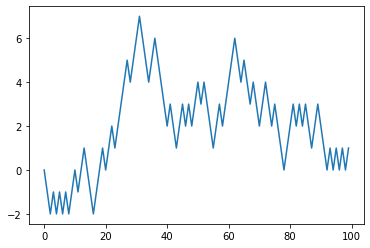

In [53]:
# Plot the first 100 values of these random walks
plt.plot(walk[:100])

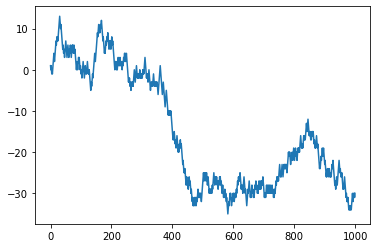

In [109]:
# Use np.random module to implement a single random walk with 1,000 steps

# Set the number of steps
nsteps = 1000

# Return random integers from the "discrete uniform" distribution in the interval [0,2)
draws = np.random.randint(0, 2, size=nsteps)

# Use np.where to set the steps
steps = np.where(draws > 0, 1, -1)

# Compute the cumulative sum
walk = steps.cumsum()

# Plot the first 100 values of these random walks
plt.plot(walk)

In [110]:
# Now we can start calculating statistics like min and max
print('Min:', walk.min(), ' and Max:', walk.max())

Min: -35  and Max: 13


In [111]:
# Get the first crossing time = the step at which the random walk reaches a particular value

# Here we might want to know how long it took the random walk to get at least 
# 10 steps away from the origin 0 in either direction

(np.abs(walk) >= 10).argmax()

27

### Simulating Many Random Walks at Once
- If your goal was to simulate many random walks, say 5,000 of them, you can generate all of the random walks with minor modifications to the preceding code. 
- If passed a 2-tuple, the **numpy.random** functions will generate a two-dimensional array of draws, and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot.

In [74]:
# Set the number of walks
nwalks = 5000

# Set the number of steps for each walk
nsteps = 1000

# Generate a two-dimensional array of draws
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1

# Use where function to set the steps to either 1 or -1
steps = np.where(draws > 0, 1, -1)

# Simulate the walks using the cumsum function for each row
walks = steps.cumsum(1)

# Show output
walks

array([[  1,   0,   1, ...,  46,  45,  44],
       [  1,   0,  -1, ...,   6,   7,   8],
       [ -1,  -2,  -3, ..., -56, -55, -54],
       ...,
       [ -1,  -2,  -1, ..., -18, -19, -18],
       [  1,   0,  -1, ...,  24,  23,  22],
       [ -1,   0,   1, ...,  14,  15,  16]], dtype=int32)

In [75]:
# We can compute the overall min and max
print('Min:', walks.min(), ' and Max:', walks.max())

Min: -128  and Max: 122


In [76]:
# Check how many of the 5000 walks crossed 30 or -30

# Use any method to check which walks crossed 30 or -30
hits30 = (np.abs(walks) >= 30).any(1)

# Count how many walks crossed 30 or -30
hits30.sum()

3367

## Book Progress

In [11]:
# Plot book progress

import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': 384},
    value = 509,
    domain = {'x': [0.1, 1], 'y': [0.2, 0.9]},
    title = {'text': "Book Pages"}))

fig.show()